In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Notes from [CSC 411](http://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/)
 ---

 ## Lecture 1 - Introduction

 Types of machine learning:
 - supervised learning (labelled examples of correct behaviour);
 - unsupervised learning (no labelled example, just pattern detection);
 - reinforcement learning (maximization of reward signal).


 Most common data-science methods:

 1. logistic regression;
 2. decision trees;
 3. random forests;
 4. neural networks;
 5. ...

 ## Lecture 2 - Nearest Neighbours

 Focus on supervised learning.

 Examples:

 | Task | Inputs | Outputs/Labels |
 |:---:|:---:|:---:|
 | object recognition | images | object categories |
 | image captioning | images | captions |
 | speech-to-text | audio waveforms | text |
 | $\vdots$ | $\vdots$ | $\vdots$ |

 Denote $t$ as the output/label/target,
 $x$ as the input, and $y$ as the output:
 - a *training dataset* (a statistical sample)
 is the set $\xi = \{(x_1}, t_1, \ldots, (x_N, t_N)\}$;
 - continuous $t_i$: *regression* problem;
 - discrete $t_i$: *classification* problem.

 Nearest-neighbour algorithm:
 1. $x^\prime = \arg \min\limits_{x_i \in \xi} D(x_i, x)$;
 2. $y = t^\prime$.


 $D(x_i, x)$ is a measure of the distance between $x_i$ and $x$.

 e.g. Euclidean distance
 $D(x_1, x_2) = |x_1 - x_2| = \sqrt{\sum\limits_{j = 1}^d \left(x_{1j} - x_{2j}\right)^2}$.

 *Decision boundary*:
 the boundary between regions of input space
 that are assigned to different categories,
 e.g. Voronoi diagram.

Text(0.5, 1.0, 'Voronoi Diagram')

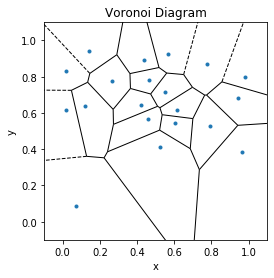

In [1]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt 
import numpy as np

num_pts = 20
np.random.seed(0)
pts = np.random.rand(num_pts, 2)
vor = Voronoi(pts)

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (4, 4))
fig = voronoi_plot_2d(vor, ax = ax, show_vertices = False)
ax.set_xlim([-0.1, 1.1])
ax.set_ylim([-0.1, 1.1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Voronoi Diagram')



 If noisy or mislabelled data present,
 use $k$-nearest-neighbour (kNN) method:

 1. find $k$ nearest neighbours;
 2. output $y$ is the majority class.


 Choose $k \approx \sqrt{N}$ to avoid over- and under-fitting.

 $k$ is an example of a *hyperparameter* that also needs to be optimized.

 Use *cross-validation*:
 - divide training dataset into 3 subsets (training, validation, and test);
 - train model with different $k$ with the training subset;
 - calculate *generalization error* for each $k$ using the validation subset;
 - calculate final error with the test subset using the error-minimizing $k$.


 Problems:
 - curse of dimensionality (need exponentially more training data);
 - scaling (need to normalize $x_i, x$ to be zero mean and unit variance);

 ## Lecture 3 - Decision Trees

 Partition input space along different attributes
 according to a tree structure:
 - test attributes at internal nodes;
 - branching by attribute value;
 - leaf nodes are the outputs/predictions.


 Learning the simplest/smallest decision tree is a NP-complete problem.

 Solution is a *greedy* heuristic:

 1. start from an empty decision tree;
 2. split at 'best' attribute;
 3. repeat.


 Recall the definition of *entropy*:
 $H(X) = -\sum\limits_{x \in X} p(x) \: \log_2 \left(p(x) \right)$.

 Joint entropy:
 $H(X, Y) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x,y) \: \log_2 \left(p(x,y) \right)$.

 Specific conditional entropy:
 $H(Y | X = x) = -\sum\limits_{y \in Y} p(y|x) \: \log_2 \left(p(y|x) \right)$.

 Conditional entropy:
 $H(Y | X) = \sum\limits_{x \in X} p(x) \: H(Y | X = x) = -\sum\limits_{x \in X}\sum\limits_{y \in Y} p(x,y) \: \log_2 \left( p(y|x) \right)$.

 Recall that $p(x) = \sum\limits_{y \in Y} p(x,y)$ and $p(y|x) = \frac{p(x,y)}{p(x)}$.

 Example: $X$ is rain-iness, $Y$ is cloud-iness.

 | | cloudy | not cloudy |
 |:---:|:---:|:---:|
 | raining | 0.24 | 0.01 |
 | not raining | 0.25 | 0.5 |

 - $H(X,Y) = \ldots = 1.56$ bits
 - $H(Y | X = x) = 0.24$ bits
 - $H(Y|X) = \ldots = 0.75$ bits


 Properties:
 - $H \geq 0$ always;
 - chain rule, $H(X,Y) = H(X|Y) + H(X) = H(Y|X) + H(Y)$;
 - $H(Y|X) = H(Y)$ if $X,Y$ are independent;
 - $H(Y|X) \leq H(Y)$.


 Define *information gain* (IG):
 $\mathrm{IG}(Y|X) = H(Y) - H(Y|X)$.
 - If $X$ is uninformative, $\mathrm{IG}(Y|X) = 0$;
 - if $X$ is completely informative, $\mathrm{IG}(Y|X) = H(Y)$.


 IG measures the informativeness of a variable
 and can thus be used to choose 'best' splitting for build a decision tree:
 - calculate $H(Y)$ at root;
 - calculate $H(Y|\textrm{leaf }j)$ at the $j$-th leaf;
 - calculate $\mathrm{IG}(Y|\{\textrm{leaf }n\}) = H(Y) - \ldots$.


 Decision tree construction algorithm:

 1. start from an empty decision tree;
 2. choose an attribute to split at a non-terminal node;
 3. split observations into groups based on attribute value
 (maximizing $\mathrm{IG}$);
 4. for each group,
    - if empty, return majority from parent;
    - if only 1 class, return class;
    - else, go to step 2.


 Advantages of decision trees over kNN:
 - works with many attributes;
 - works with discrete attributes;
 - works with missing values;
 - robust to scale of inputs;
 - fast at test time;
 - more interpretable.


 Advantages of kNN over decision trees:
 - few hyperparameters;
 - handles complex attributes;
 - can define complex distance measures;
 - typically better in practice.

 ## Lecture 4 - Ensembles

 An *ensemble* of predictors is a set of predictors
 whose individual decisions are combined to classify
 new observations, e.g. majority vote.

 The predictors could differ by
 the algorithms used, hyperparameter choices,
 training datasets used, etc.

 Two types: *bagging* or *boosting*.

 *Loss function*:
 - measures the difference between the prediction/estimate $y$
 and the target $t$;
 - e.g. $L_{0-1}(y,t) = \begin{cases} 0 & y = t \\ 1 & y \neq t \end{cases}$;
 - e.g. $L_\textrm{SE} = \frac{1}{2} (y - t)^2$.


 *Bias-variance decomposition*:
 - consider a model trained over a set of training sets;
 - the prediction $y$ at some query point $x$ is a random variable,
 where the randomness is based on the choice of the training set;
 - treating $t$ as a random variable,
 $y_\star = \mathrm{E}[t|x]$ is the best possible prediction;
 - $\mathrm{E}[(y-t)^2|x] = (y - y_\star)^2 + \mathrm{var}[t|x]$;
 - the 2nd term is called the *Bayes error* (inherent unpredictability/noise);
 - treating $y$ as a random variable,
 $\mathrm{E}[(y-t)^2|x] = \ldots = (y_\star - \mathrm{E}[y|x])^2 + \mathrm{var}[y|x] + \mathrm{var}[t|x]$;
    1. *bias* error (i.e. underfitting);
    2. *variance* error (i.e. overfitting);
    3. Bayes error;
 - simplistic model (e.g. kNN with high $k$):
 high bias but low variance;
 - complicated model (e.g. kNN with low $k$):
 low bias but high variance;


 ### Bagging

 If $m$ independent training sets could be obtained from
 the generating distribution $p_\textrm{data}$,
 compute $y = \frac{1}{m} \sum\limits_{i=1}^m y_i$
 where $y_i$ is the prediction based on each training set.

 Changes:
 - Bayes error: unchanged;
 - bias: unchanged;
 - variance: reduced due to sampling.

 Problem: more data may be impossible.
 Solution: *bootstrap aggregation* or *bagging*.
 - given a training set of size $n$;
 - generate $m$ new sets by sampling uniformly
 and with replacement (elements can be selected more than once);
 - since datasets are no longer independent,
 $\mathrm{var}\left[\frac{1}{m}\sum\limits_{i=1}^m \right] = \frac{1}{m} (1-\rho) \sigma^2 + \rho \sigma^2$;
 - $\rho$ is correlation of the sampled predictions;
 - add more randomness to reduce $\rho$.


 *Random forests* is an ensemble of random decision trees:
 - decision trees + bagging + randomness for decorrelation;
 - at each node, choose a random set of $d$ input features
 and split only on these;
 - fixes overfitting of decision trees.
